# Object Oriented Programming (OOP) Python:

### Author: Samyakh Tukra (2017) 


Okay so starting with OOP is actually quite simple.... just follow the example shown below where I recreate a classic programming language called LOGO which was used to teach programming to me in CMA (my school in Gujarat India). The idea was that commands are given to the turtle which moved and the turtle would print out a trajectory of its movement.

So let's get started......

Before I do so, it is important to understand some terminology! consider the following definition/script:
Objects are representation of the real world i.e. car, dog, bike etc. There are 2 main characteristics of an object: data and behaviour.

e.g. Object = Car, this object has its own data we want to use i.e. no of wheels, no of doors, max acceleration, seating capacity and etc (attributes its made of). It also has behaviour: drive, stop, accelerate (i.e. things it does).

Therefore data are known as attributes  (i.e. things it comprises of) and behaviour is known as methods (things it can do). A Class is a blue print from with this would be created i.e. a category. A class car can have different objects like tesla, bmw and mercedes.

##### Within a class we can assign attributes which are common to all objects.
for example, the objects tesla, bmw and mercedes will have the same attributes(data needed to define them). and perhaps the same methods (things they can do) the only thing that varies is the actual value/capacity at which they can be done... i.e. max speed of bmw may be 155mph whereas a tesla may do 250mph.

##### thus Classes come first and then objects, which are instances of classes. i.e. Car is the class, tesla model s is the object. Or Class= vegetables and object = okra.

A class is simply used to group data and functions in a category (makes cleaner looking code.... highly applicable in gaming) its a blue print... consider the example below

In [1]:
# I am going to create a vehicle class
''' remember classes have attributes(properties) and methods (functions) and
objects are instances of classes.'''

class Vehicle: # to define a class simply use the class function followed by class name
    def __init__(self, number_of_wheels, type_of_tank, seating_capacity, maximum_velocity):
        # init is your initialiser, it initialises the input arguements needed for your attributes
        # self is always used as the first argument, this is so that when we call objects
        # objects can refer to these attributes as part of the class!
        self.number_of_wheels = number_of_wheels
        self.type_of_tank = type_of_tank # this will essentially be the value needed
        self.seating_capacity = seating_capacity
        self.maximum_velocity = maximum_velocity

In [2]:
tesla_model_s = Vehicle(4, 'electric', 5, 250) # defining a tesla model object
# to define an object we define it using the class Vehicle(attributes)


Now that we understand the basics..... let's go deeper and try to recreate the classic game logo and see how that works with basic OOP


In [14]:
# first import the necessary libraries:
import sys, os, math, random, functools
import numpy as np
import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim


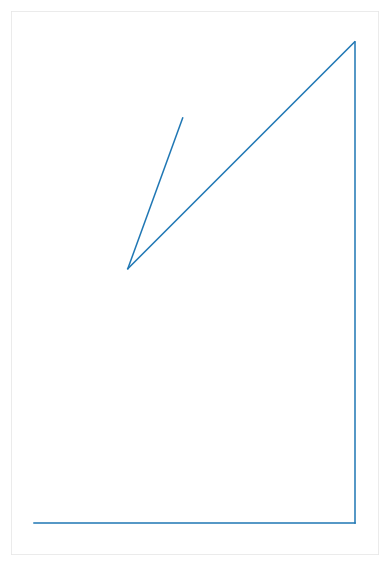

In [17]:
''' So we need 2 classes, 1 being the turtle which will hold position, pen, angle
and movement ofcourse since it will respond to our commands. 2 being the Terarrium
which will be important for hilding the image of what we draw and displaying the
trajectory.'''

class Turtle(object):
    # before the init function we can define the class attributes which are common to all instances i.e. like a global variable
    deg = math.pi/180.0
      # every class needs to begin with an initializer! this is to state all the variables the following methods will use:
    def __init__(self,Terrarium):
        self.pos = (0,0) # start with the initial position of the origin
        self.angle = 0 
        self.pen= True # pen to down!
        self.axes= Terrarium.axes
        '''at first instance just state the functions (i.e. methods) and fill them with pass so that they are python legal
        fill the methods with the relevant instructions later
        note all methods( functions) take their first argument as "self" this is to refer back to the instnce of which we call a method'''
    def forward(self,distance): # forward movement
        new_position= (self.pos[0] + distance* math.cos(self.deg*self.angle),
                       self.pos[1] + distance * math.sin(self.deg*self.angle))
        '''Using trignometry, [0] is the x coordinate and [1] is the y coordinate if the angle is in degrees I multiply by a constant
        defined by the class attribute deg to turn it into radians.'''
        if self.pen: # if pen is down we will draw
            Line= pp.Line2D((self.pos[0],new_position[0]),(self.pos[1],new_position[1])) 
            self.axes.add_line(Line)
                  
        self.pos= new_position
            
    def back(self,distance):
        self.forward(-distance)
            
    def left(self,angle): # moving to the left at an angle
        self.angle = (self.angle + angle) % 360 # I may want to input a new angle so I replace the original
            
    def right(self,angle): # moving to the right at an angle
        self.angle = (self.angle - angle) % 360
            
    def pen_on(self):
        self.pen = True # I want to draw the trajectory
            
    def pen_off(self):
        self.pen = False     # I don't want to draw the trajectory



class Terarrium(object):
    def __init__(self):
            # Now to actually implement the drawing:
        self.figure = pp.figure(figsize=(10,10))
        self.axes= pp.axes()
           
            # to get rid of the axis lines:
        self.axes.set_xticks([])
        self.axes.set_yticks([])

        for spine in ['bottom','top','left','right']:
            self.axes.spines[spine].set_color('0.9')


            # Putting the rescaling in a separate method:
    def rescale(self):
        self.axes.axis('scaled')

        xmin,xmax,ymin,ymax = self.axes.axis()
        dx= (xmax - xmin)/50
        self.axes.axis([xmin-dx,xmax+dx,ymin-dx,ymax+dx])
            
T= Terarrium()

turtle1= Turtle(T)# where the turtle lives

# Let's try it out
turtle1.forward(100)
turtle1.left(90) #degrees
turtle1.forward(150)
turtle1.right(45) #degrees
turtle1.back(100)
turtle1.left(25)
turtle1.forward(50)
turtle1.left(45)

T.rescale()


### So above we covered two topics: Abstraction (creating classes and implementing them) and Encapsulation (Grouping data members and methods together)

## Now Let's look at Inheritance:

In [26]:
'''inheritance is where we build more specialised objects from simpler ones so
essentially we can copy and paste our simple classes and add new stuff to it without
having to repeatedly create them again and again'''

# consider the following example:

def polyspi(t,side,angle):
    if side:
        t.forward(side)
        t.right(angle)
        polyspi(t,side-2,angle)
